In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/thutranghoa/Code/Data_analysis/Data/Dataset.csv')
df

,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
0,Wednesday,01-06-18,3,2,35,17,2
1,Wednesday,01-06-18,3,3,36,16,3
2,Wednesday,01-06-18,3,4,27,25,5
3,Wednesday,01-06-18,3,5,23,23,3
4,Wednesday,01-06-18,3,6,18,42,2
...,...,...,...,...,...,...,...
1434,Friday,10-06-18,5,140,47,38,1
1435,Friday,10-06-18,5,141,15,8,4
1436,Friday,10-06-18,5,142,26,38,1
1437,Friday,10-06-18,5,143,16,34,3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          1439 non-null   object
 1   Date         1439 non-null   object
 2   CodedDay     1439 non-null   int64 
 3   Zone         1439 non-null   int64 
 4   Weather      1439 non-null   int64 
 5   Temperature  1439 non-null   int64 
 6   Traffic      1439 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 78.8+ KB


In [3]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

df['Day'] = e.fit_transform(df['Day'])
df['Date'] = e.fit_transform(df['Date'])
df

,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
0,6,0,3,2,35,17,2
1,6,0,3,3,36,16,3
2,6,0,3,4,27,25,5
3,6,0,3,5,23,23,3
4,6,0,3,6,18,42,2
...,...,...,...,...,...,...,...
1434,0,9,5,140,47,38,1
1435,0,9,5,141,15,8,4
1436,0,9,5,142,26,38,1
1437,0,9,5,143,16,34,3


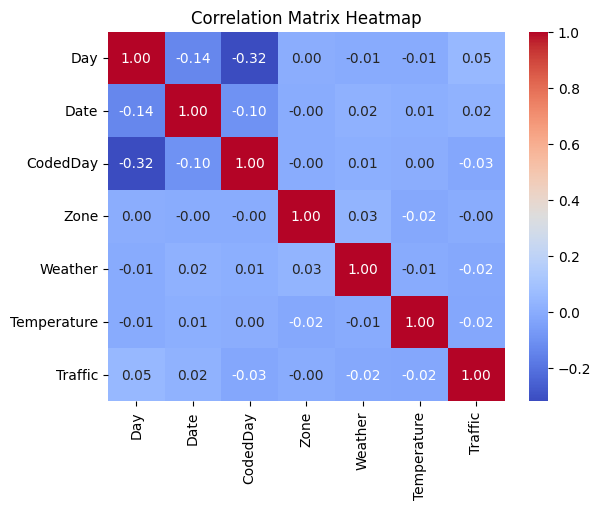

In [6]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()


' Heat map'
corr_matrix = df.corr()

# Set up the matplotlib figure
# plt.figure(figsize=(20, 16))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [7]:
X=df.drop(['Traffic'],axis=1)
Y=df['Traffic']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

rf = RandomForestRegressor(n_estimators = 300, random_state = 0)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
if(y_pred_rf.all()<2.5):
    y_pred1=np.round(y_pred_rf-0.5)
    
else:
    y_pred1=np.round(y_pred_rf+0.5)

acc_rf=(y_pred1 - y_test)/y_test
acc_rf = 100 - round(acc_rf.mean()*100,2)
print ('Accurancy : ', acc_rf)

Accurancy :  87.03


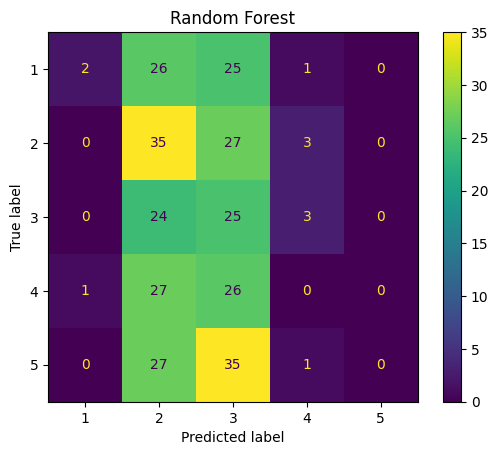

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, classification_report

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
plt.title ('Random Forest')
plt.show()

In [25]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train,y_train)
y_pred_sv = svr.predict(X_test)
if(y_pred_sv.all()<2.5):
    y_pred=np.round(y_pred_sv-0.5)
    
else:
    y_pred=np.round(y_pred_sv+0.5)

acc_sv=(y_pred - y_test)/y_test
acc_sv = 100 - round(acc_sv.mean()*100,2)
print ('Accurancy : ', acc_sv)

Accurancy :  86.56


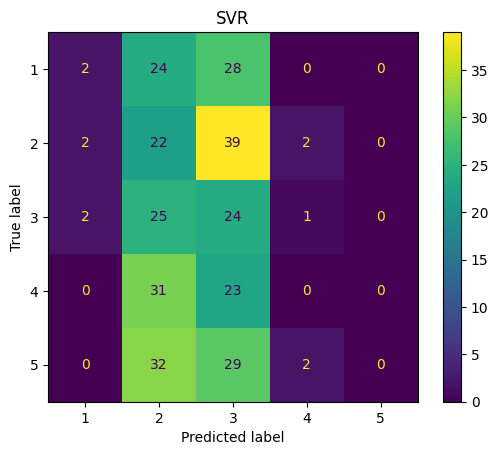

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, classification_report

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title ('SVR')
plt.show()

Text(0.5, 1.0, 'Accurancy of each model')

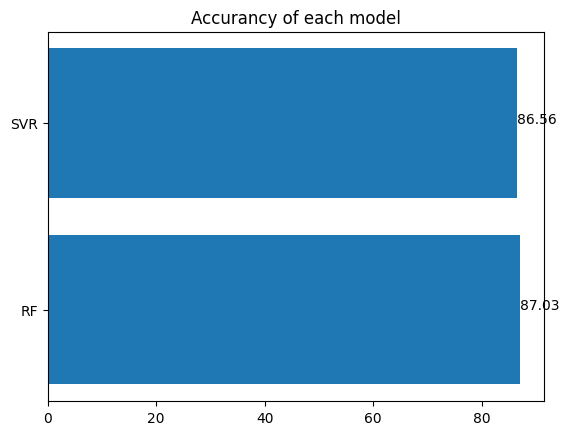

In [33]:
X = ['RF', 'SVR']
y = [acc_rf, acc_sv]

plt.barh (X, y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.title('Accurancy of each model')


<Axes: xlabel='Weather', ylabel='Temperature'>

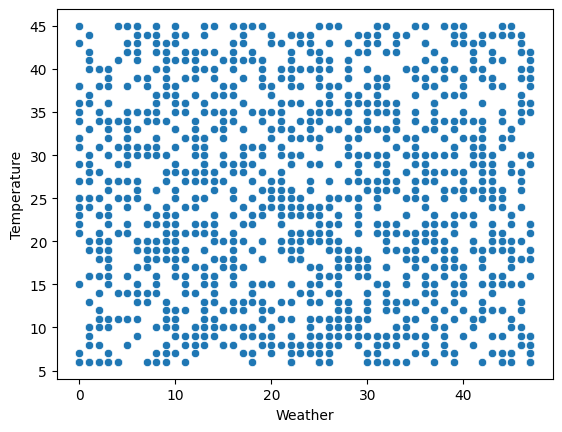

In [34]:
import seaborn as sns 

sns.scatterplot(df, x = 'Weather', y = 'Temperature')

Dựa trên scatter plot và correlation matrix, ta ket luận weather và temperature không có mối liên hệ 